# 소프트맥스 (다중 분류 로지스틱 회귀 모델)
M개의 입력을 받아 N개의 클래스로 출력하는 로지스틱 회귀 모델을 케라스로 구현해보도록 하겠습니다.  
보통 다중 분류 로지스틱 회귀 모델을 소프트맥스(softmax)라고 부릅니다.  
케라스에서 제공하는 MNIST 데이터를 사용하여 숫자를 0에서부터 9까지 분류해보도록 하겠습니다.  

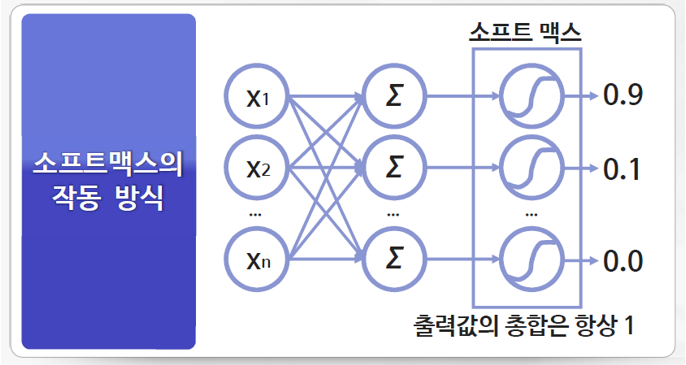

- 케케라에 내장된 데이터셋 확인
- from keras.datasets import

In [3]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=cf3948a7c0a6fae04a5c29d712f308a56ad2ec67e141af1070ec280a53168d9d
  Stored in directory: /Users/mjkim/Library/Caches/pip/wheels/2f/e9/19/d3d310a06735013bf467216222ebb92b1158c5d3ae006bf92a
Successfully built keras.utils


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation
#from keras.utils import to_categorical
from keras.datasets import mnist

MNIST 손글씨 데이터를 다운로드 받아서 변수에 저장합니다.

In [41]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()

손글씨 데이터(train_data, train_label)가 가로 28픽셀, 세로 28픽셀로 구성된 것을 확인할 수 있습니다.  

학습에 사용될 train_data는 총 60000개의 데이터, 테스트에 사용될 test_data는 총 10000개의 데이터가 있습니다.

In [42]:
print(len(train_data))
print(len(train_label))
print(len(test_data))
print(len(test_label))

60000
60000
10000
10000


- 학습용 데이터가 어떤 구성인지 확인

In [43]:
print("train_data (count, row, column) : " + str(train_data.shape) )
print("test_data (count, row, column) : " + str(test_data.shape) )

train_data (count, row, column) : (60000, 28, 28)
test_data (count, row, column) : (10000, 28, 28)


- 학습 데이터의 하나를 샘플로 보도록 하겠습니다. 
- 다음과 같이, 각각의 픽셀은 0부터 255까지의 값을 가지고 있습니다.
    - 흰색 : 0, 검정색 : 255

In [44]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

`모델 학습 시작에 앞서, 데이터를 정규화합니다.`

정규화는 입력값을 0부터 1의 값으로 변경하게 됩니다.  
정규화된 입력값은 경사하강법으로 모델 학습 시, 보다 쉽고 빠르게 최적의 W, B를 찾는 데 도움을 줍니다.

In [45]:
train_data = train_data.astype('float32') 
test_data = test_data.astype('float32') 
train_data /= 255 
test_data /= 255

아래의 명령어를 통해 정규화된 데이터를 확인할 수 있습니다.

In [46]:
print(train_data[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

test_data, test_label 손글씨 데이터 (28*28 픽셀 데이터)에 해당하는 숫자를 나타냅니다.  
test_data 총 6만개, test_label 총 1만개의 숫자를 가지고 있습니다.

In [47]:
print("train_label (count) : " + str(train_label.shape) )
print("test_label (count) : " + str(test_label.shape) )

train_label (count) : (60000,)
test_label (count) : (10000,)


아래의 코드를 실행하여, test_data과 test_label에서 샘플로 숫자를 출력해봅니다.

(숫자 뒤에 ,(콤마) 가 찍히는 것은 튜플이다.)

In [48]:
print("sample from test_data : " + str(train_label[0]) )
print("sample from test_label : " + str(test_label[0]) )

sample from test_data : 5
sample from test_label : 7


이번 실습에서는 28 * 28 픽셀의 지역적인 정보를 사용하지 않고, 단순히 정규화된 입력값만을 가지고, 숫자 분류를 할 것이기 때문에, 행과 열의 구분 없이, 단순히 784 길이의 배열로 데이터를 단순화시킵니다.

In [49]:
input_dim = 784  # 28*28 
train_data = train_data.reshape(60000, input_dim) 
test_data = test_data.reshape(10000, input_dim) 

다음 명령어를 실행하여, 현재 우리의 데이터가 2차원 데이터가 아닌 단순한 1차원 데이터로 변경된 것을 확인할 수 있습니다.

In [50]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


학습 시, test 값과의 cross entropy를 측정해야하므로, 아래의 코드를 실행하여 test를 one hot encoding으로 변환시켜줍니다.

In [51]:
from keras.utils.np_utils import to_categorical

In [52]:
num_classes = 10
train_label = to_categorical(train_label, num_classes)
test_label = to_categorical(test_label, num_classes)

아래 코드를 실행하여, 5였던 값이, one hot encoding으로 변환되어,  
클래스 갯수만큼의 길이를 갖는 벡터로 변경이 되었고, 5에 해당되는 인덱스의 값만 1인 것을 확인할 수 있습니다.

In [53]:
print(train_label[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


케라스의 Sequential()을 사용하여 간단하게 소프트맥스를 구현할 수 있습니다.  
총 784개(28*28)의 입력을 받아서, 10개의 시그모이드 값을 출력하는 모델을 아래의 코드를 실행하여 구현합니다.

In [54]:
model = Sequential() 
model.add(Dense(input_dim=input_dim, units = 10, activation='softmax'))

모델의 학습을 진행합니다.  
10개의 클래스로 분류할 것이기 때문에, categorical_crossentropy를 비용함수로 사용한 경사하강법으로 최적의 W와 bias를 학습합니다.

In [55]:
# bgd, sgd, mini bgd : optimizer 에 들어갈 종류가 세 가지이다.
# sgd 가 속도가 빠르다. 보편적으로 세번째꺼를 많이 쓴다.
# loss : 에러율. loss가 적은게 좋다.


model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

model.fit(train_data, train_label, batch_size=2048, epochs=100, verbose=0) 

테스트를 진행하여, 정확도를 측정합니다.

In [56]:
score = model.evaluate(test_data, test_label) 
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 790us/step - loss: 0.4237 - accuracy: 0.8912
Test accuracy: 0.8912000060081482


아래의 코드를 실행하여, 소프트맥스 모델의 구조를 쉽게 시각화 할 수 있습니다.  
총 10개의 로지스틱회귀가 있고, 각 로지스틱회귀는 784개의 weight와 1개의 bias를 갖고 있기 때문에, 총 7850 (785*10)개의 Param이 있는 것을 보실 수 있습니다.

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


첫번째 레이어에 존재하는 w1, w2,...,w784, b1, b2,..., b10은 아래의 명령어로 확인하실 수 있습니다.

In [59]:
model.layers[0].weights

[<tf.Variable 'dense_2/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.05248307,  0.08446135, -0.04943677, ..., -0.02647561,
         -0.01745062, -0.03380546],
        [ 0.06864592, -0.02724693,  0.03379788, ..., -0.07346117,
         -0.07376594, -0.08682922],
        [ 0.07415128, -0.03386679, -0.05993779, ...,  0.06541202,
          0.04271225, -0.05667876],
        ...,
        [-0.00901556, -0.08393121, -0.02163993, ...,  0.07098814,
          0.02629066,  0.01849108],
        [-0.04300413, -0.07375361,  0.07526065, ..., -0.08391683,
         -0.08646265, -0.04766209],
        [ 0.05446797,  0.02589104,  0.01293553, ..., -0.00662494,
         -0.00331584, -0.05320326]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.07428052,  0.1545949 , -0.02987109, -0.06379302,  0.04754638,
         0.16004145, -0.0237586 ,  0.11319212, -0.24452834, -0.03914293],
       dtype=float32)>]

- x 에서 시그마로 들어갈 때의 가중치를 나타낸다.

- sgd(Stochastic Gradient Decent) : 확률적경사하강법
- categorical_crossentropy : 분류대상이 3개 이상인 경우에 주로 사용
- metrics : 

-------------------------------

In [30]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

train_data, test_data, train_label, test_label = train_test_split(features, labels,
                                                                 test_size=0.2)

In [ ]:
image = train_x[0]
image.shape

plt.imshow(image) # 옵션으로 'gray' 를 지정하면 흑백으로 출력된다.
plt.show()

- 컬러 : (28, 28, RGB)
- 흑백 : (28, 28, Gray)

In [ ]:
# 차원수 늘리기 -> -1 은 맨뒤의 차원을 늘리고, 0은 맨 앞의 차원을 늘린다.
nptrain_x = np.expand_dims(train_x, -1)

new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

- 첫번째 이미지에 대한 정답 확인 (train_y)

In [ ]:
train_y[0]

- 사람이 아닌 컴퓨터가 이해할 수 있는 숫자로 변환해준다.(원 핫-인코딩)

In [27]:
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings(action='ignore')

In [28]:
# 레이블 인코딩 데이터를 핫 인코딩 형식으로 변환해준다.
to_categorical(0, 10)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
label = train_y[0]

label_onehot = to_categorical(label, num_classes=10)
label_onehot

In [ ]:
plt.title(label_onehot)
plt.imshow(train_x[0], 'gray')
plt.show()